# HR Analytics
**Objective**: Your task is to build a machine learning model that predicts the probability of a
candidate seeking a new job or staying with DataCorp after completing the training. The
model should leverage demographic, educational, and experiential attributes of the
candidates to make these predictions. This will help DataCorp focus resources on
candidates more likely to stay, enhancing the quality and efficiency of their training
programs.


## Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_df = pd.read_csv('./data/aug_train.csv')
test_df = pd.read_csv('./data/aug_test.csv')

## Exploratory Data Analysis
- A total of 14 variables
- 2 float variables, 2 integer variables and 10 object variables (There is need for encoding)
- enrollee_id is unique and should be dropped (there is no meaningful insights from it)
- Presence of null values hence should be handled

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Missing values handling strategy
- Columns with more than 50% missing values should be dropped (no variable has more than 50% missing values)
- If missing values is greater 10%, replace the blanks with `unspecified` if column is of object type (So that we don't affect the originality of the data)
- If missing values is less than 10%, then it can be imputed

In [4]:
# Check for missing values
train_df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
# Check missing values percentage for strategy
def missing_percentage(df):
    # Count the number of missing values in each column
    missing_values = df.isnull().sum()

    # Total number of rows in the dataframe
    total_rows = len(df)

    # Calculate the percentage of missing values in each column
    percentage_missing_values = (missing_values / total_rows) * 100
    return  percentage_missing_values

In [6]:
# Check the missing values as a dataframe
train_missing = missing_percentage(train_df)
test_missing = missing_percentage(test_df)

train_missing = train_missing.reset_index().rename(columns={'index': 'column', 0: 'missing%'})
test_missing = test_missing.reset_index().rename(columns={'index': 'column', 0: 'missing%'})

In [7]:
train_missing

,column,missing%
0,enrollee_id,0.000000
1,city,0.000000
2,city_development_index,0.000000
3,gender,23.530640
4,relevent_experience,0.000000
5,enrolled_university,2.014824
6,education_level,2.401086
7,major_discipline,14.683161
8,experience,0.339284
9,company_size,30.994885


In [8]:
test_missing

,column,missing%
0,enrollee_id,0.000000
1,city,0.000000
2,city_development_index,0.000000
3,gender,23.860968
4,relevent_experience,0.000000
5,enrolled_university,1.456083
6,education_level,2.442461
7,major_discipline,14.654767
8,experience,0.234852
9,company_size,29.215594


### If missing values is greater 10%, replace the blanks with `unspecified` if column is of object type (So that we don't affect the originality of the data)

In [9]:
# Get the columns with missing values greater than 10%
train_cols = train_missing[train_missing['missing%']>10]['column'].to_list()
# Replace the missing values with unspecified if the column is of object datatype
train_df.select_dtypes(include='object').loc[:,train_cols] = train_df.select_dtypes(include='object').loc[:,train_cols].fillna('unspecified')

In [10]:
# Get the columns of test_df with missing values greater than 10%
test_cols = test_missing[test_missing['missing%']>10]['column'].to_list()
# Replace the missing values with unspecified if the column is of object datatype
test_df.select_dtypes(include='object').loc[:,test_cols] = test_df.select_dtypes(include='object').loc[:,test_cols].fillna('unspecified')

### If missing values is less than 10%, then it can be imputed

In [11]:
# Check for missing values after the changes
missing_percentage(train_df)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.000000
relevent_experience       0.000000
enrolled_university       2.014824
education_level           2.401086
major_discipline          0.000000
experience                0.339284
company_size              0.000000
company_type              0.000000
last_new_job              2.207955
training_hours            0.000000
target                    0.000000
dtype: float64

In [12]:
# Check for missing values after the changes
missing_percentage(test_df)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.000000
relevent_experience       0.000000
enrolled_university       1.456083
education_level           2.442461
major_discipline          0.000000
experience                0.234852
company_size              0.000000
company_type              0.000000
last_new_job              1.878816
training_hours            0.000000
dtype: float64

In [13]:
# Replace the missing values of numerical columns with median
# Median is less affected by outliers
train_df.select_dtypes(include=['int64', 'float64']).fillna(train_df.select_dtypes(include=['int64', 'float64']).median(), inplace=True)

test_df.select_dtypes(include=['int64', 'float64']).fillna(test_df.select_dtypes(include=['int64', 'float64']).median(), inplace=True)

In [14]:
# Replace the missing values of object columns with the mode
def object_missing_handler(df):
    for col in df.select_dtypes(include='object'):
        mode_val = df[col].mode()[0] # get the mode value as a string and leave out the rest
        df[col] = df[col].fillna(mode_val)
    return df

In [15]:
train_df = object_missing_handler(train_df)
missing_percentage(train_df)

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64

In [16]:
test_df = object_missing_handler(test_df)
missing_percentage(test_df)

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
dtype: float64

### Drop unnecessary columns and plot graphs
- Target contains imbalanced classes, hence needs to be handled. (Can use `downsampling`, `oversampling` or `SMOTE`)
- Box-plot shows presence of outliers. This will affect the model that we will use

In [17]:
train_df.drop('enrollee_id', axis=1, inplace=True)

In [18]:
test_df.drop('enrollee_id', axis=1, inplace=True)

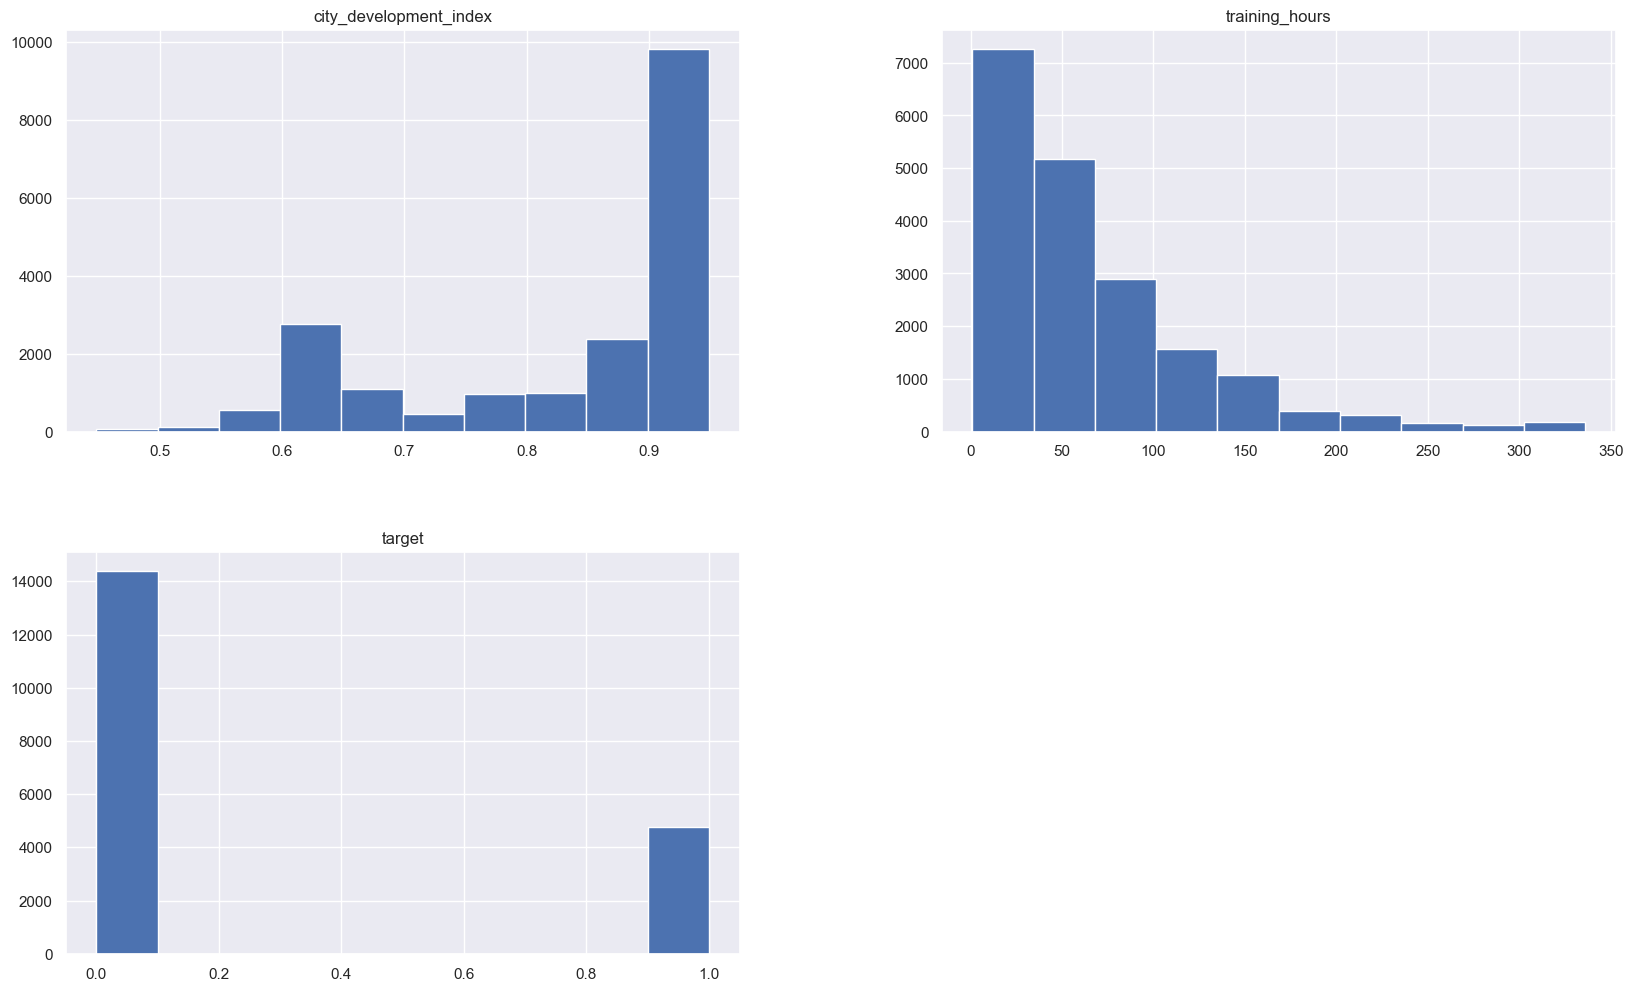

In [19]:
# Plot a histogram of the numeric columns
int_cols = train_df.select_dtypes(include=['float', 'int']).columns.to_list()
train_df[int_cols].hist(figsize=(20,12))
plt.title("Distributions of Numeric Variables", size=20)
plt.show()

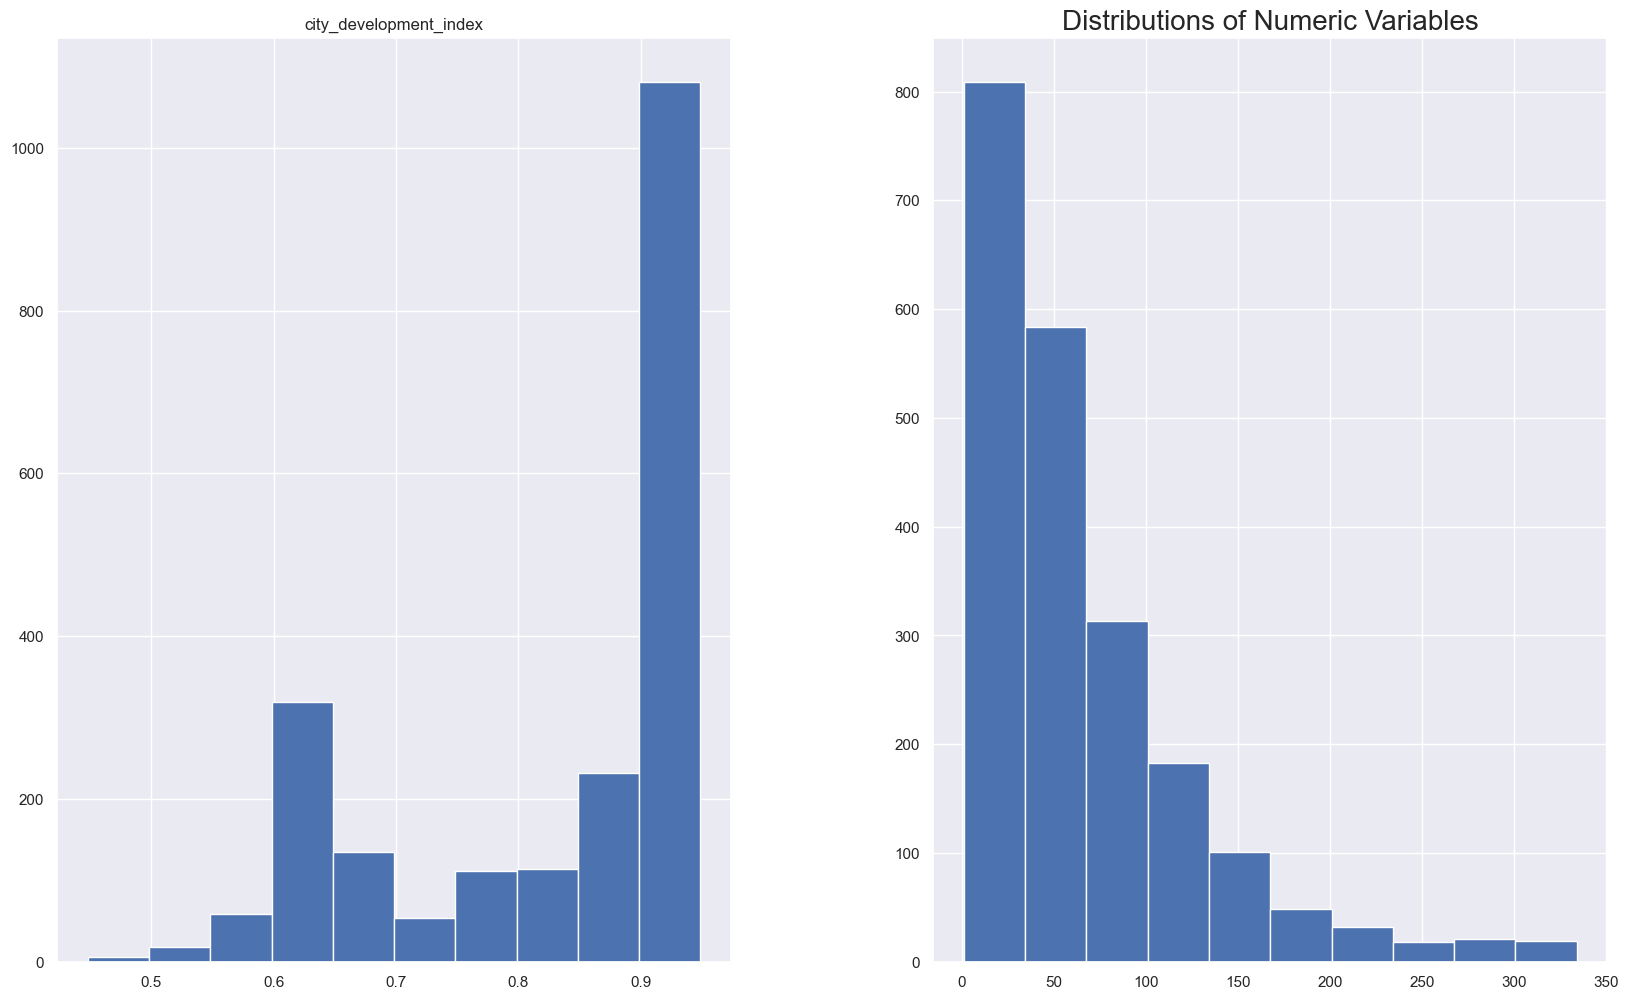

In [20]:
# Plot a histogram of the numeric columns
int_cols = test_df.select_dtypes(include=['float', 'int']).columns.to_list()
test_df[int_cols].hist(figsize=(20,12))
plt.title("Distributions of Numeric Variables", size=20)
plt.show()

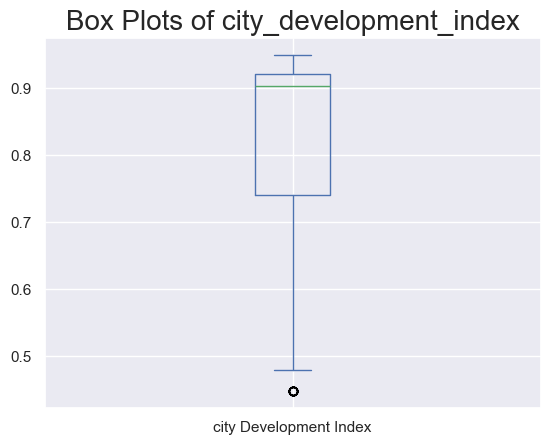

In [21]:
# Plot a histogram of the numeric columns
int_cols = train_df.select_dtypes(include=['float', 'int']).columns.to_list()
train_df[int_cols[0]].plot(kind='box', label='city Development Index')
plt.title(f"Box Plots of {int_cols[0]}", size=20)
plt.show()

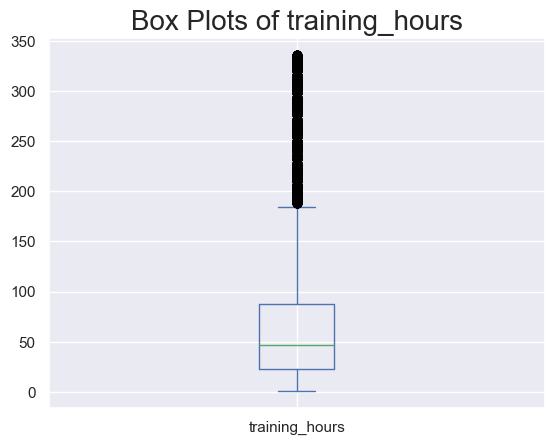

In [22]:
train_df[int_cols[1]].plot(kind='box')
plt.title(f"Box Plots of {int_cols[1]}", size=20)
plt.show()

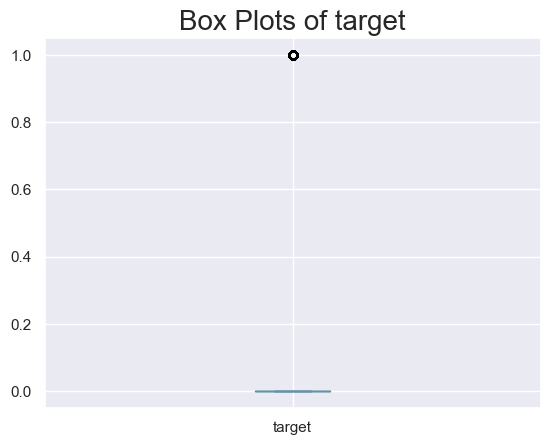

In [23]:
train_df[int_cols[2]].plot(kind='box')
plt.title(f"Box Plots of {int_cols[2]}", size=20)
plt.show()

## Data Validation of object columns
- The data is valid, as the groups do not contain ambiguity, or spelling iaaues due to human error
- City contains very many groups.

In [24]:
# Check if all categories are valid
def check_unique_vals(df):
    for col in df.select_dtypes(include='object').columns.to_list():
        print(col)
        print(df[col].unique())
        print()

In [25]:
check_unique_vals(train_df)

city
['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'city_44' 'city

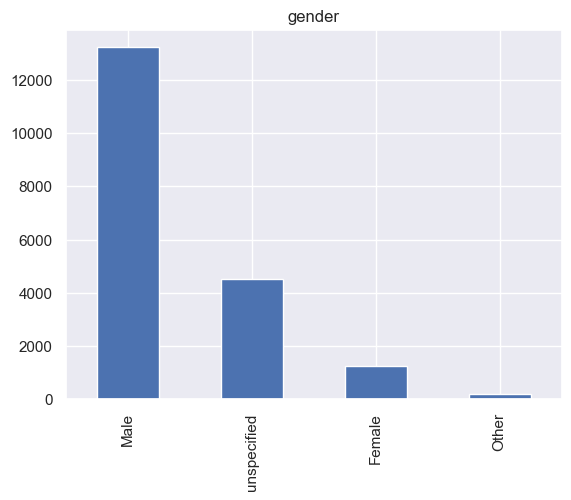

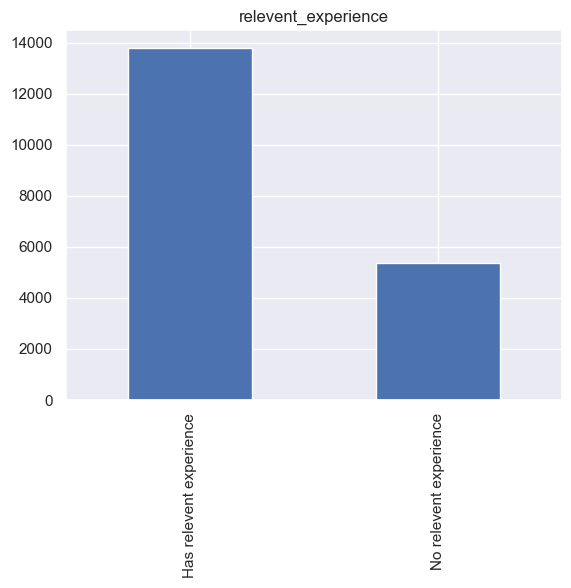

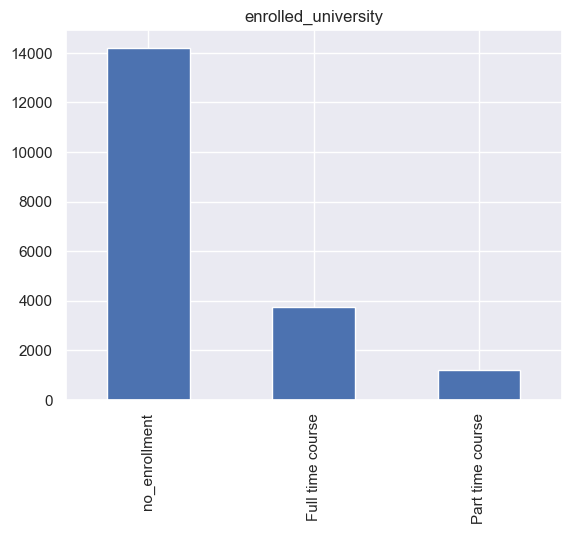

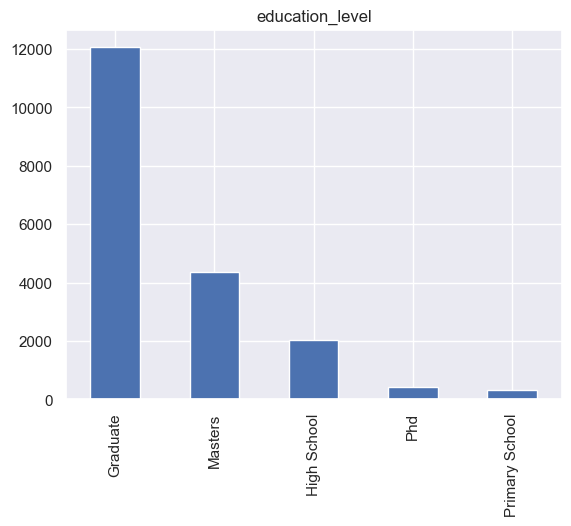

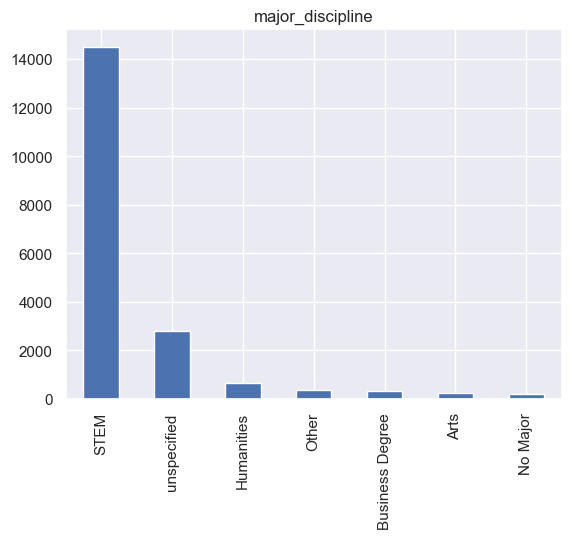

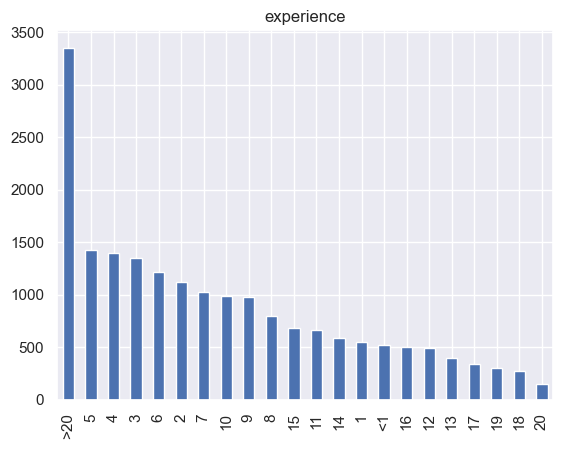

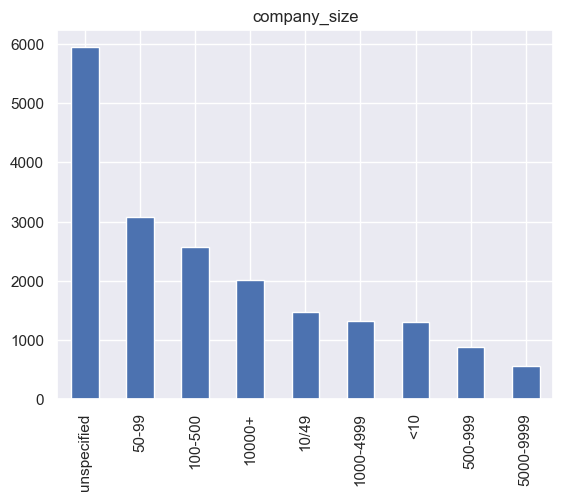

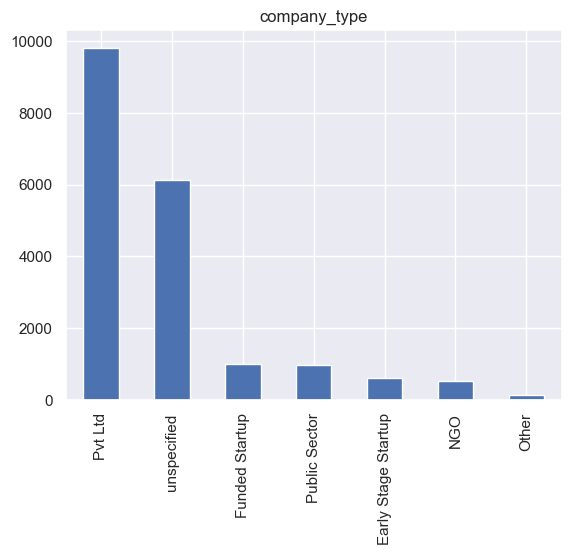

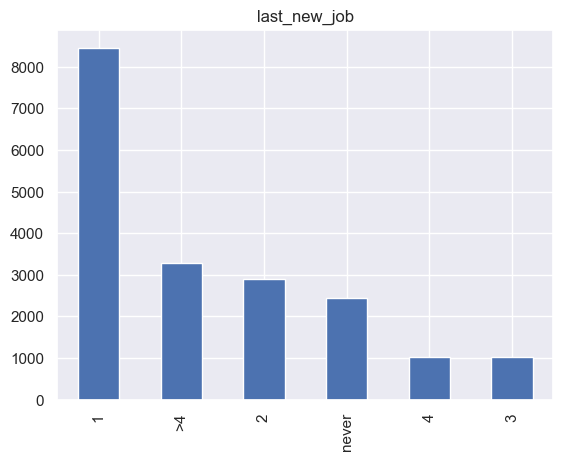

In [26]:
obj_cols = ['gender', 'relevent_experience', 'enrolled_university', 
            'education_level', 'major_discipline', 'experience', 
            'company_size', 'company_type', 'last_new_job']
for item in obj_cols:
    train_df[item].value_counts().plot(kind='bar')
    plt.title(item)
    plt.show()

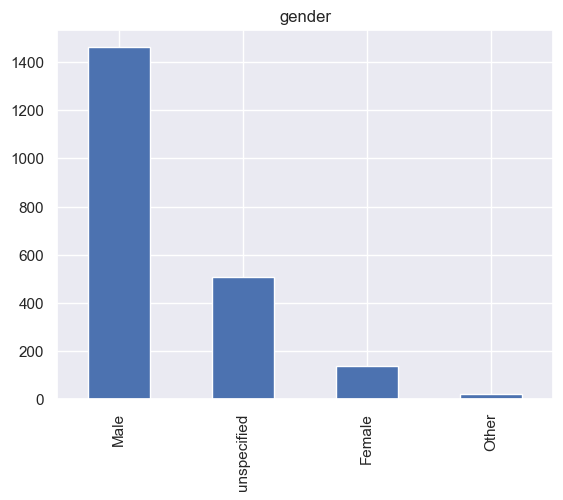

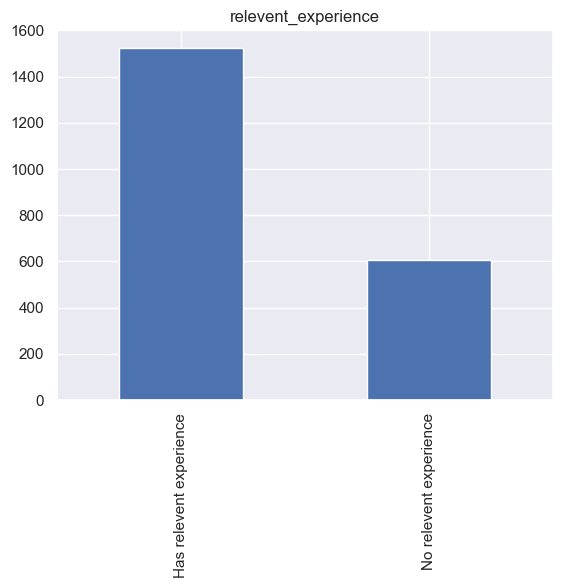

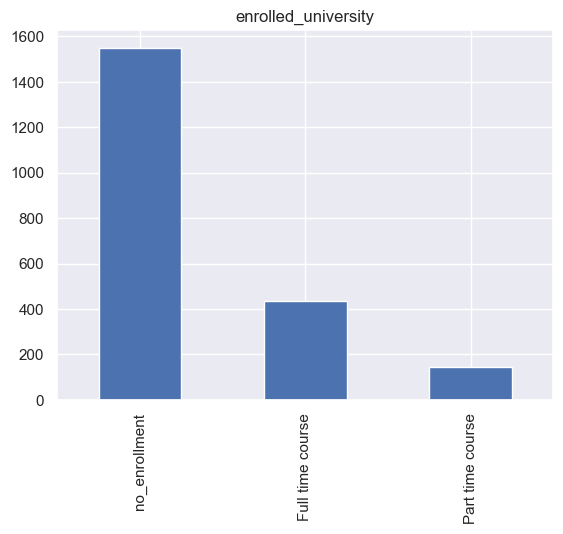

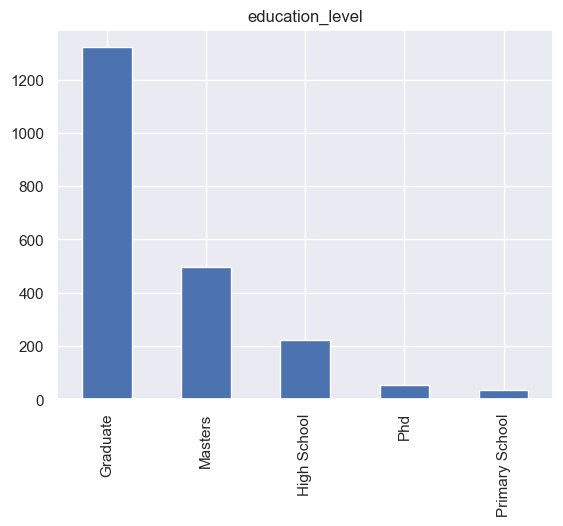

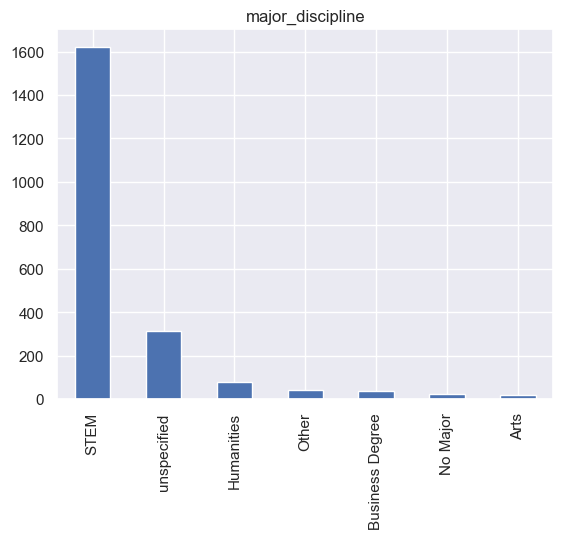

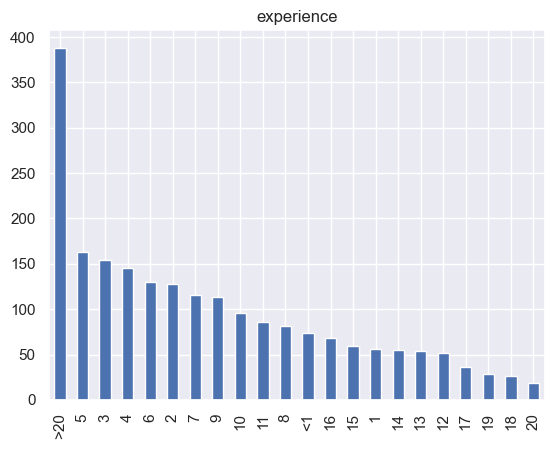

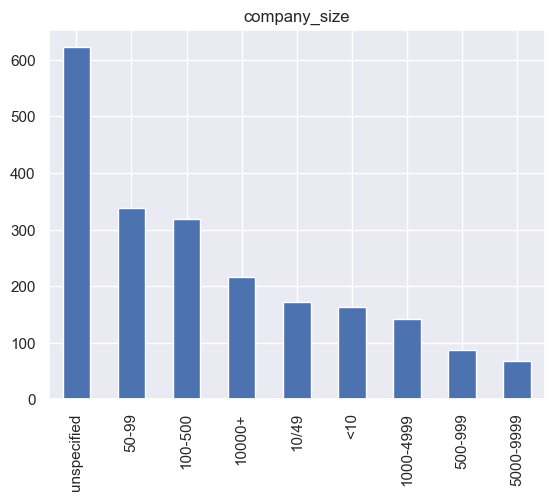

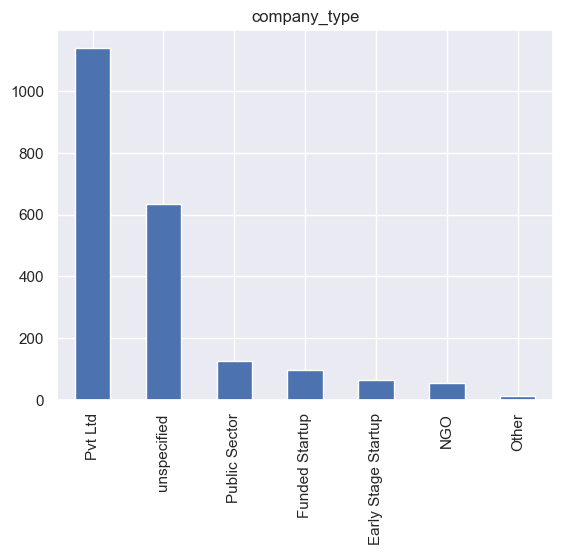

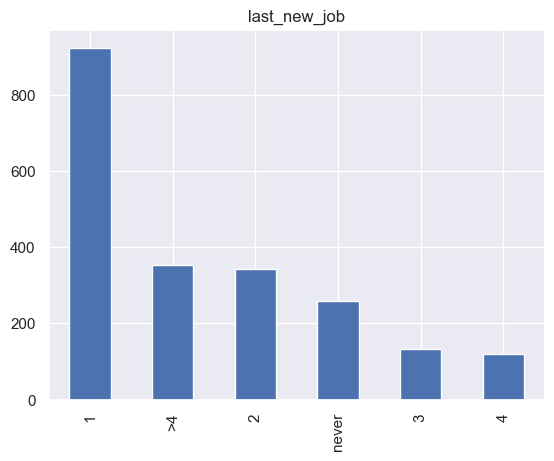

In [27]:
for item in obj_cols:
    test_df[item].value_counts().plot(kind='bar')
    plt.title(item)
    plt.show()

## Feature Scaling

In [28]:
# Create the features and label
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1].values
y_train = y_train.reshape(len(y_train), 1)

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Standardise the numerical columns
X_train[int_cols] = sc.fit_transform(X_train[int_cols])

X_train

KeyError: "['target'] not in index"

### Encoding Categorical Variables

In [31]:
X_train = pd.get_dummies(X_train, drop_first=True)

test_data = pd.get_dummies(test_df, drop_first=True)

### SMOTE to handle imbalanced data

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [33]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardise the whole dataset
std_scaler = StandardScaler().fit(X_train_resampled)

def preprocessor(X):
    D = np.copy(X)
    D = std_scaler.transform(D)
    return D

In [34]:
preprocessor_transformer = FunctionTransformer(preprocessor)
preprocessor_transformer

FunctionTransformer(func=<function preprocessor at 0x0000014AB38C3310>)

### Fit a logistic regression

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

p1 = Pipeline([('scaler', preprocessor_transformer),
              ('Logistic Regression', LogisticRegression())])
p1

Pipeline(steps=[('scaler',
                 FunctionTransformer(func=<function preprocessor at 0x0000014AB38C3310>)),
                ('Logistic Regression', LogisticRegression())])

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
import warnings

def fit_and_print(p, X_train=X_train, X_test=X_val, y_train=y_train, y_test=y_val):
    warnings.filterwarnings('ignore')
    # Fit the transformer
    p.fit(X_train, y_train)
    # Predict the train and test outputs
    test_prediction =p.predict(X_test)
    
    # Print the errors
    print("Accuracy Score:   "+str(accuracy_score(test_prediction, y_test)*100))
    print("Precision Score:  "+str(precision_score(test_prediction, y_test)*100))
    print("Recall Score:     "+str(recall_score(test_prediction, y_test)*100))
    print("roc_auc_score:    "+str(accuracy_score(test_prediction, y_test)*100))
    print("\nConfusion Matrix:\n", confusion_matrix(test_prediction, y_test))

In [37]:
fit_and_print(p1)

Accuracy Score:   78.47077244258872
Precision Score:  39.705882352941174
Recall Score:     60.095389507154216
roc_auc_score:    78.47077244258872

Confusion Matrix:
 [[2629  574]
 [ 251  378]]


### Oversampling to handle imbalanced data
- Produced the best model

In [38]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler()

X_imb_res, y_imb_res = over_sampler.fit_resample(X_train, y_train)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_imb_res, y_imb_res, test_size=0.25)
X_train, X_val, y_train, y_val = X_train.values, X_val.values, y_train, y_val
# Standardise the whole dataset
std_scaler = StandardScaler().fit(X_train)

### Fit a logistic regression

In [40]:
fit_and_print(p1, X_train=X_train, X_test=X_val, y_train=y_train, y_test=y_val)

Accuracy Score:   76.89097548252478
Precision Score:  75.89223233030091
Recall Score:     77.21609113563545
roc_auc_score:    76.89097548252478

Confusion Matrix:
 [[2253  689]
 [ 640 2169]]


### Fit a RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
p2 = Pipeline([('scaler', preprocessor_transformer),
              ('RFC', RandomForestClassifier())])
fit_and_print(p2, X_train=X_train, X_test=X_val, y_train=y_train, y_test=y_val)

Accuracy Score:   89.23665449487046
Precision Score:  94.61161651504548
Recall Score:     85.32660145156201
roc_auc_score:    89.23665449487046

Confusion Matrix:
 [[2428  154]
 [ 465 2704]]


### Boosting with AdaBoost  and Decision trees

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=200,
algorithm="SAMME.R", learning_rate=0.5)

In [43]:
p5 = Pipeline([('scaler', preprocessor_transformer),
              ('AdaCL', ada_clf)])
fit_and_print(p5, X_train=X_train, X_test=X_val, y_train=y_train, y_test=y_val)

Accuracy Score:   76.71709267953399
Precision Score:  75.01749475157453
Recall Score:     77.4286746117732
roc_auc_score:    76.71709267953399

Confusion Matrix:
 [[2268  714]
 [ 625 2144]]


### Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
p6 = Pipeline([('scaler', preprocessor_transformer),
              ('GBC', GradientBoostingClassifier())])
fit_and_print(p6, X_train=X_train, X_test=X_val, y_train=y_train, y_test=y_val)

Accuracy Score:   77.37784733089897
Precision Score:  76.03219034289714
Recall Score:     77.91323054858373
roc_auc_score:    77.37784733089897

Confusion Matrix:
 [[2277  685]
 [ 616 2173]]


### XGBOOST

In [45]:
from xgboost import XGBClassifier

p7 = Pipeline([('scaler', preprocessor_transformer),
              ('XGBC', XGBClassifier())])
fit_and_print(p7, X_train=X_train, X_test=X_val, y_train=y_train, y_test=y_val)

[15:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score:   81.65536428447227
Precision Score:  82.57522743177047
Recall Score:     80.90503942406582
roc_auc_score:    81.65536428447227

Confusion Matrix:
 [[2336  498]
 [ 557 2360]]


### Random forest Classifier is the best performing model based on the metrics

In [46]:
testing_df  = test_df

In [47]:
test_df = pd.get_dummies(test_df, drop_first=True)

In [48]:
X_test = test_df

In [49]:
train_unique = train_df['city'].unique()
test_unique = testing_df['city'].unique()

# Find values that are in train_unique but not in test_unique
not_in_test = set(train_unique) - set(test_unique)

# Find values that are in test_unique but not in train_unique
not_in_train = set(test_unique) - set(train_unique)

print("Values in train_unique but not in test_unique:", not_in_test)
print("Values in test_unique but not in train_unique:", not_in_train)

Values in train_unique but not in test_unique: {'city_111', 'city_62', 'city_109', 'city_166', 'city_131', 'city_8', 'city_140', 'city_146', 'city_129', 'city_81', 'city_7', 'city_120', 'city_59', 'city_55', 'city_18'}
Values in test_unique but not in train_unique: set()


In [50]:
import pandas as pd

# Assuming train_data and test_data are your pandas DataFrames

# Identify unique categories across both datasets
all_categories = set(train_df['city']).union(set(testing_df['city']))

# Reindex both datasets to include all unique categories
train_data_reindexed = train_df.reindex(columns=all_categories, fill_value=0)
test_data_reindexed = testing_df.reindex(columns=all_categories, fill_value=0)


# Perform one-hot encoding using pd.get_dummies()
train_encoded = pd.get_dummies(train_data_reindexed, drop_first=True)
test_encoded = pd.get_dummies(test_data_reindexed, drop_first=True)

other_cols = train_df.drop(['city', 'target'], axis=1).columns.to_list()

train_encoded[other_cols] = train_df[other_cols]
test_encoded[other_cols] = testing_df[other_cols]

# Now train_encoded and test_encoded contain one-hot encoded representation
# Make sure you handle other columns appropriately as needed

In [52]:
# Standardize the Data
sc = StandardScaler()
train_encoded = pd.get_dummies(train_data_reindexed, drop_first=True)
test_encoded = pd.get_dummies(test_data_reindexed, drop_first=True)
train = sc.fit_transform(train_encoded)
test = sc.transform(test_encoded)
y_train = train_df.iloc[:,-1].values
y_train = y_train.reshape(len(y_train), 1)

# Create KNN regressor with the best parameters
rnd_clf = RandomForestClassifier()

rnd_clf.fit(train, y_train)

# Making test predictions
predictions = rnd_clf.predict(test)

In [56]:
testing_df['predictions'] = predictions